## Advanced Analytics
## Assignment 1 - Churn

### Group 11
Lisa Driessen<BR>
Laura Fernandez Lopez<BR>
Silvia Maria Goñi Mendia<BR>
Peter Day

In [1]:
#pip install xgboost

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
# https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Column names
['client_id', 'homebanking_active', 'has_homebanking', 'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap', 'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance', 'has_personal_loan', 'has_mortgage_loan', 'has_current_account', 'has_pension_saving', 'has_savings_account', 'has_savings_account_starter', 'has_current_account_starter', 'bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap', 'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance', 'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account', 'bal_pension_saving', 'bal_savings_account', 'bal_savings_account_starter', 'bal_current_account_starter', 'visits_distinct_so', 'visits_distinct_so_areas', 'customer_since_all', 'customer_since_bank', 'customer_gender', 'customer_birth_date', 'customer_postal_code', 'customer_occupation_code', 'customer_self_employed', 'customer_education', 'customer_children', 'customer_relationship', 'target']


https://www.statology.org/pandas-rename-columns/


# Merging data

In [3]:
# csv data files are in a folder called data
file1 = "../data/train_month_1.csv"
file2 = "../data/train_month_2.csv"
file3 = "../data/train_month_3_with_target.csv"
files = [file3, file2, file1]
# https://stackoverflow.com/questions/68607106/creating-multiple-dataframes-using-for-loop-with-pandas
# my_dfs = {}
# for x in ['A', 'B', 'C']:
#     my_dfs[x] = pd.read_csv(r"C:\HSTS\OB\ODO\%s\test.csv" % x, delimiter=';')
# Then access the dataframes per key:
# my_dfs['A']

listnames = ['data3', 'data2', 'data1']
my_dfs = {}
for i in range(3):
    my_dfs[listnames[i]] = pd.read_csv(files[i])


In [4]:
# https://www.tutorialspoint.com/How-to-iterate-through-a-dictionary-in-Python
cols = ["customer_since_all", "customer_since_bank", "customer_birth_date"]
# for column in stu_df[['Name', 'Section']]:
# df[col] = pd.to_datetime(df[col])

# This converts the 3 time cols in the 3 dfs to datetime format then subtracts 'current date' to get time since
for k, v in my_dfs.items():
    print(k)
    for col in cols:
        v[col] = (pd.to_datetime('2018-03-01') - pd.to_datetime(v[col])).dt.days
        #v[col] = v[col].astype(int)
        
# if you run this more than once it gets confused, will have to start over by running the cell above too!

data3
data2
data1


In [5]:
data3 = my_dfs['data3']
data2 = my_dfs['data2']
data1 = my_dfs['data1']

In [6]:
# Rename columns with lag suffix
data3.columns = ['client_id', 'homebanking_active_l0', 'has_homebanking_l0', 'has_insurance_21_l0', 'has_insurance_23_l0', 'has_life_insurance_fixed_cap_l0', 'has_life_insurance_decreasing_cap_l0', 'has_fire_car_other_insurance_l0', 'has_personal_loan_l0', 'has_mortgage_loan_l0', 'has_current_account_l0', 'has_pension_saving_l0', 'has_savings_account_l0', 'has_savings_account_starter_l0', 'has_current_account_starter_l0', 'bal_insurance_21_l0', 'bal_insurance_23_l0', 'cap_life_insurance_fixed_cap_l0', 'cap_life_insurance_decreasing_cap_l0', 'prem_fire_car_other_insurance_l0', 'bal_personal_loan_l0', 'bal_mortgage_loan_l0', 'bal_current_account_l0', 'bal_pension_saving_l0', 'bal_savings_account_l0', 'bal_savings_account_starter_l0', 'bal_current_account_starter_l0', 'visits_distinct_so_l0', 'visits_distinct_so_areas_l0', 'customer_since_all_l0', 'customer_since_bank_l0', 'customer_gender_l0', 'customer_birth_date_l0', 'customer_postal_code_l0', 'customer_occupation_code_l0', 'customer_self_employed_l0', 'customer_education_l0', 'customer_children_l0', 'customer_relationship_l0', 'target']
data2.columns = ['client_id', 'homebanking_active_l1', 'has_homebanking_l1', 'has_insurance_21_l1', 'has_insurance_23_l1', 'has_life_insurance_fixed_cap_l1', 'has_life_insurance_decreasing_cap_l1', 'has_fire_car_other_insurance_l1', 'has_personal_loan_l1', 'has_mortgage_loan_l1', 'has_current_account_l1', 'has_pension_saving_l1', 'has_savings_account_l1', 'has_savings_account_starter_l1', 'has_current_account_starter_l1', 'bal_insurance_21_l1', 'bal_insurance_23_l1', 'cap_life_insurance_fixed_cap_l1', 'cap_life_insurance_decreasing_cap_l1', 'prem_fire_car_other_insurance_l1', 'bal_personal_loan_l1', 'bal_mortgage_loan_l1', 'bal_current_account_l1', 'bal_pension_saving_l1', 'bal_savings_account_l1', 'bal_savings_account_starter_l1', 'bal_current_account_starter_l1', 'visits_distinct_so_l1', 'visits_distinct_so_areas_l1', 'customer_since_all_l1', 'customer_since_bank_l1', 'customer_gender_l1', 'customer_birth_date_l1', 'customer_postal_code_l1', 'customer_occupation_code_l1', 'customer_self_employed_l1', 'customer_education_l1', 'customer_children_l1', 'customer_relationship_l1']
data1.columns = ['client_id', 'homebanking_active_l2', 'has_homebanking_l2', 'has_insurance_21_l2', 'has_insurance_23_l2', 'has_life_insurance_fixed_cap_l2', 'has_life_insurance_decreasing_cap_l2', 'has_fire_car_other_insurance_l2', 'has_personal_loan_l2', 'has_mortgage_loan_l2', 'has_current_account_l2', 'has_pension_saving_l2', 'has_savings_account_l2', 'has_savings_account_starter_l2', 'has_current_account_starter_l2', 'bal_insurance_21_l2', 'bal_insurance_23_l2', 'cap_life_insurance_fixed_cap_l2', 'cap_life_insurance_decreasing_cap_l2', 'prem_fire_car_other_insurance_l2', 'bal_personal_loan_l2', 'bal_mortgage_loan_l2', 'bal_current_account_l2', 'bal_pension_saving_l2', 'bal_savings_account_l2', 'bal_savings_account_starter_l2', 'bal_current_account_starter_l2', 'visits_distinct_so_l2', 'visits_distinct_so_areas_l2', 'customer_since_all_l2', 'customer_since_bank_l2', 'customer_gender_l2', 'customer_birth_date_l2', 'customer_postal_code_l2', 'customer_occupation_code_l2', 'customer_self_employed_l2', 'customer_education_l2', 'customer_children_l2', 'customer_relationship_l2']

In [7]:
data3.head(3)

,client_id,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,...,customer_since_bank_l0,customer_gender_l0,customer_birth_date_l0,customer_postal_code_l0,customer_occupation_code_l0,customer_self_employed_l0,customer_education_l0,customer_children_l0,customer_relationship_l0,target
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,8613.0,1,27210,3630,9.0,0,0.0,NaN,NaN,0
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,424.0,1,8794,2460,9.0,0,NaN,mature,couple,0
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,13604.0,2,29736,2660,9.0,0,NaN,NaN,single,0


In [8]:
# Join the 3 data frames into one.
data4 = data3.merge(data2, on='client_id', how='inner')
data_Nans = data4.merge(data1, on='client_id', how='inner')


In [9]:
data_Nans.head(3)

,client_id,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,...,customer_since_all_l2,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,12784.0,8613.0,1,27210,3630,9.0,0,0.0,NaN,NaN
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,424.0,424.0,1,8794,2460,9.0,0,NaN,mature,couple
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,13604.0,13604.0,2,29736,2660,9.0,0,NaN,NaN,single


In [10]:
# Impute without target for 115 columns to use with test data
data_Nans = data_Nans.drop(columns='target', axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data_Nans)
data = pd.DataFrame(data=imputer.transform(data_Nans), columns=data_Nans.columns)

In [11]:
data.customer_children_l0.unique()

array(['no', 'mature', 'young', 'preschool', 'adolescent', 'grownup',
       'onebaby', 'yes'], dtype=object)

In [12]:
data.customer_relationship_l0.unique()

array(['couple', 'single'], dtype=object)

In [13]:
data.head(3)

,client_id,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,...,customer_since_all_l2,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,12784.0,8613.0,1,27210,3630,9.0,0,0.0,no,couple
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,424.0,424.0,1,8794,2460,9.0,0,3.0,mature,couple
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,13604.0,13604.0,2,29736,2660,9.0,0,3.0,no,single


# Preprocessing

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
#correlation matrix, check for corr >0.7 or corr < -0.7
#homebanking active + has homebanking = 0.83
corrMatrix = data3.corr()
print(corrMatrix)

                                      homebanking_active_l0  \
homebanking_active_l0                              1.000000   
has_homebanking_l0                                 0.836034   
has_insurance_21_l0                                0.147394   
has_insurance_23_l0                                0.031775   
has_life_insurance_fixed_cap_l0                    0.010467   
has_life_insurance_decreasing_cap_l0               0.370733   
has_fire_car_other_insurance_l0                    0.104131   
has_personal_loan_l0                               0.177037   
has_mortgage_loan_l0                               0.359048   
has_current_account_l0                             0.478934   
has_pension_saving_l0                              0.123796   
has_savings_account_l0                            -0.029550   
has_savings_account_starter_l0                     0.102035   
has_current_account_starter_l0                     0.149816   
bal_insurance_21_l0                                0.10

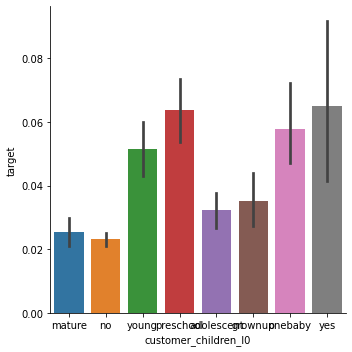

In [16]:
#maybe combine mature and no into one bin (or with adolescents + grown-ups) and another bin with yes and small children
sns.catplot(x= 'customer_children_l0', y = 'target',kind = 'bar', data = data3, legend_out = True)

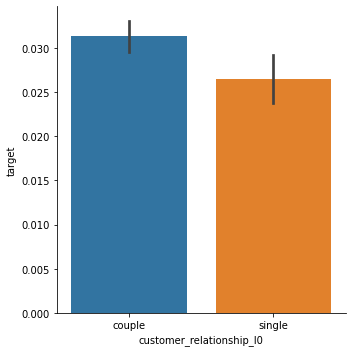

In [17]:
#no significant influence of single or not
sns.catplot(x= 'customer_relationship_l0', y = 'target',kind = 'bar', data = data3, legend_out = True)

In [18]:
#df.edjefe.replace(to_replace=['no', 'yes'], value=[0, 1])
data.replace(to_replace=['no', 'mature', 'young', 'preschool', 'adolescent', 'grownup', 'onebaby', 'yes'],
             value=[0, 0, 1, 1, 1, 1, 1, 1], inplace=True)
data.replace(to_replace=['couple', 'single'], value=[1, 0], inplace=True)

In [19]:
data.shape

(63697, 115)

In [20]:
y = data3['target'].copy()

In [21]:
# https://www.statology.org/drop-column-pandas/
X = data.drop(columns='client_id', axis=1)
# scaler = StandardScaler()
# fit = scaler.fit(X)
# Z = fit.transform(X)

In [22]:
# Split data for training/validation, assuming balanced classes
# by default 75/25 split.  33 is a rndm seed - for reproducibility
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=33)

In [23]:
X_train.head(3)

,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,has_current_account_l0,...,customer_since_all_l2,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2
41804,0,0,0,0,0,0,0,0,0,0,...,3315.0,3315.0,2,26206,2070,9.0,0,3.0,0,1
51011,1,1,0,0,0,0,0,0,1,1,...,2130.0,2130.0,1,12173,6640,4.0,1,2.0,0,1
48324,1,1,0,0,0,0,1,0,0,1,...,4838.0,4383.0,1,8429,3620,9.0,0,3.0,0,1


# Try with oversampling/undersampling

In [27]:
#ONLY do oversampling on training set
df_train = X_train.copy()
df_train['target']= y_train
df_train.head(3) #include train set

,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,has_current_account_l0,...,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2,target
41804,0,0,0,0,0,0,0,0,0,0,...,3315.0,2,26206,2070,9.0,0,3.0,0,1,0
51011,1,1,0,0,0,0,0,0,1,1,...,2130.0,1,12173,6640,4.0,1,2.0,0,1,0
48324,1,1,0,0,0,0,1,0,0,1,...,4383.0,1,8429,3620,9.0,0,3.0,0,1,0


In [28]:
df_train['target'].value_counts()

0    46341
1     1431
Name: target, dtype: int64

In [29]:
# upsampling
#https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['target']==0)] 
df_minority = df_train[(df_train['target']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 46341, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [31]:
# undersampling
#https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['target']==0)] 
df_minority = df_train[(df_train['target']==1)] 
# upsample minority class
df_majority_undersampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1431, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

We found that undersampling yielded better results in terms of precision and recall than both oversampling and using the unbalanced dataset.

/home/muddy/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

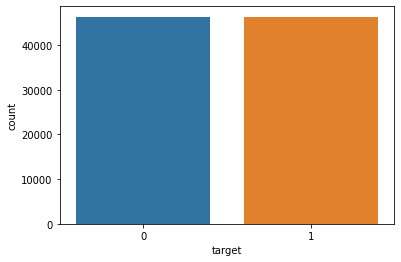

In [32]:
sns.countplot(df_upsampled['target'])

In [34]:
#make oversampled trainingset
X_train_undersampled = df_undersampled.drop(['target'], axis=1)
X_train_undersampled.head(3)

,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,has_current_account_l0,...,customer_since_all_l2,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2
57141,0,0,0,0,0,0,0,0,0,0,...,8035.0,7913.0,2,20819,9120,9.0,0,3.0,1,1
24565,0,0,0,0,0,0,0,0,0,1,...,5418.0,5418.0,2,27879,3560,9.0,0,3.0,0,1
51203,0,0,0,0,0,0,0,0,0,1,...,2981.0,2981.0,2,18536,1050,9.0,0,3.0,0,1


In [35]:
#make oversampled trainingset
y_train_undersampled = df_undersampled['target']
y_train_undersampled.head(3)

57141    0
24565    0
51203    0
Name: target, dtype: int64

In [36]:
X_train = X_train_undersampled
y_train = y_train_undersampled

# Assessing numerous models

In [43]:
def precision(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if (cm[0][1]+cm[1][1]) == 0:
        return(0.0)
    else:
        prec = cm[1][1]/(cm[0][1]+cm[1][1])
        return(prec)
def recall(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    recl = cm[1][1]/sum(cm[1])
    return(recl)
def totalfalserate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tfr = (cm[0][1]+cm[1][0])/sum(sum(cm))
    return(tfr)

In [95]:
# really slow: SVC(kernel="rbf", C=0.025, probability=True),
models = {
    'RF': RandomForestClassifier(max_depth=5, random_state=0),
    'KNN': KNeighborsClassifier(9),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'AB': AdaBoostClassifier(),
    'GB': GradientBoostingClassifier(),
    'MLP': MLPClassifier((20,20), random_state=33, max_iter=500)
}

<A HREF="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics">Sklearn Metrics</A><BR>

In [96]:
# CV slows this down
results = []
for name, classifier in models.items():
    print(classifier)
    result = []
    modfit = classifier.fit(X_train, y_train)   
    y_pred = classifier.predict(X_valid)
    result.append(name)
    result.append(metrics.accuracy_score(y_valid, y_pred))
    result.append(precision(y_valid, y_pred))
    result.append(recall(y_valid, y_pred))
    result.append(np.mean(cross_val_score(modfit, X_valid, y_valid, scoring = 'balanced_accuracy', cv=10)))
    # UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
    #fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_pred, pos_label=2)
    #result.append(metrics.auc(fpr, tpr))
    results.append(result)

RandomForestClassifier()
KNeighborsClassifier(n_neighbors=9)
DecisionTreeClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=500, random_state=33)


In [97]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric = ['auc', 'map'],
    random_state=33
)
xgbfit = xgb.fit(X_train, y_train, verbose=False, eval_set=[(X_valid, y_valid)])

In [98]:
xgbresult = []
xgbresult.append('XGB')
y_pred = xgbfit.predict(X_valid)
xgbresult.append(metrics.accuracy_score(y_valid, y_pred))
xgbresult.append(precision(y_valid, y_pred))
xgbresult.append(recall(y_valid, y_pred))
xgbresult.append(np.mean(cross_val_score(xgbfit, X_valid, y_valid, scoring = 'balanced_accuracy', cv=10)))
results.append(xgbresult)

# Results

In [99]:
print('{:<8} {:<10} {:<10} {:<8} {:<8} {:<6}'.format('Model', 'Accuracy', 'Precision', 'Recall', 'Bal Acy', 'Avg'))
for result in results:
    avg = round((result[1]+result[2]+result[3]+result[4])/(len(result)-1), 3)
    print('{:<8} {:<10} {:<10} {:<8} {:<8} {:<6}'.format(result[0], str(round(result[1],3)), 
                                                  str(round(result[2],3)), str(round(result[3],3)), 
                                                   str(round(result[4],3)),avg))

Model    Accuracy   Precision  Recall   Bal Acy  Avg   
RF       0.652      0.056      0.662    0.5      0.468 
KNN      0.647      0.051      0.602    0.501    0.45  
DT       0.585      0.041      0.573    0.519    0.43  
AB       0.681      0.06       0.649    0.5      0.473 
GB       0.689      0.062      0.654    0.499    0.476 
MLP      0.583      0.045      0.633    0.522    0.446 
XGB      0.655      0.053      0.616    0.507    0.458 


In [ ]:
#F1 score might be good?
# https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook
# Try xgboost classifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric = ['auc', 'map'],
    random_state=33
)
model2 = xgb.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

In [28]:
#gives R2
xgb.score(X_valid, y_valid)

0.9692307692307692

In [ ]:
#CV with balanced accuracy, taking into account imbalanced character of data shows bad performance
cv_scores = cross_val_score(model2, X_valid, y_valid, scoring = 'balanced_accuracy', cv=10)
cv_scores
print(np.mean(cv_scores))

In [30]:
y_predxgb = xgb.predict(X_valid)
print(confusion_matrix(y_valid, y_predxgb))

[[15434     9]
 [  481     1]]


c:\users\peter\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [31]:
tn, fp, fn, tp = confusion_matrix(y_valid, y_predxgb).ravel()
(tn, fp, fn, tp)

(15434, 9, 481, 1)

In [100]:
for i in range(1, 12, 2):
    kn = KNeighborsClassifier(i)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_valid)
    print(kn)
    print("precision: %.4f" % precision(y_valid, y_pred))
    print("recall: %.4f" % recall(y_valid, y_pred))
    print("-------------------------")

KNeighborsClassifier(n_neighbors=1)
precision: 0.0423
recall: 0.5892
-------------------------
KNeighborsClassifier(n_neighbors=3)
precision: 0.0446
recall: 0.5747
-------------------------
KNeighborsClassifier()
precision: 0.0471
recall: 0.5830
-------------------------
KNeighborsClassifier(n_neighbors=7)
precision: 0.0475
recall: 0.5747
-------------------------
KNeighborsClassifier(n_neighbors=9)
precision: 0.0507
recall: 0.6017
-------------------------
KNeighborsClassifier(n_neighbors=11)
precision: 0.0514
recall: 0.6017
-------------------------


K is higher for the balanced undersampled data than it was for the original unbalanced training set.

## Now predict on test data

In [85]:
file1_test = "../data/test_month_1.csv"
file2_test = "../data/test_month_2.csv"
file3_test = "../data/test_month_3.csv"
files_test = [file3_test, file2_test, file1_test]

listnames_test = ['data3_test', 'data2_test', 'data1_test']
my_dfs_test = {}
for i in range(3):
    my_dfs_test[listnames_test[i]] = pd.read_csv(files_test[i])


In [86]:
# This converts the 3 time cols in the 3 dfs to datetime format then subtracts 'current date' to get time since
cols_test = ["customer_since_all", "customer_since_bank", "customer_birth_date"]
for k, v in my_dfs_test.items():
    print(k)
    print(len(v))
    for col in cols_test:
        v[col] = (pd.to_datetime('2018-03-01') - pd.to_datetime(v[col])).dt.days

data3_test
27300
data2_test
27300
data1_test
27300


In [87]:
data3_test = my_dfs_test['data3_test']
data2_test = my_dfs_test['data2_test']
data1_test = my_dfs_test['data1_test']


In [88]:
# Rename columns with lag suffix
data3_test.columns = ['client_id', 'homebanking_active_l0', 'has_homebanking_l0', 'has_insurance_21_l0', 'has_insurance_23_l0', 'has_life_insurance_fixed_cap_l0', 'has_life_insurance_decreasing_cap_l0', 'has_fire_car_other_insurance_l0', 'has_personal_loan_l0', 'has_mortgage_loan_l0', 'has_current_account_l0', 'has_pension_saving_l0', 'has_savings_account_l0', 'has_savings_account_starter_l0', 'has_current_account_starter_l0', 'bal_insurance_21_l0', 'bal_insurance_23_l0', 'cap_life_insurance_fixed_cap_l0', 'cap_life_insurance_decreasing_cap_l0', 'prem_fire_car_other_insurance_l0', 'bal_personal_loan_l0', 'bal_mortgage_loan_l0', 'bal_current_account_l0', 'bal_pension_saving_l0', 'bal_savings_account_l0', 'bal_savings_account_starter_l0', 'bal_current_account_starter_l0', 'visits_distinct_so_l0', 'visits_distinct_so_areas_l0', 'customer_since_all_l0', 'customer_since_bank_l0', 'customer_gender_l0', 'customer_birth_date_l0', 'customer_postal_code_l0', 'customer_occupation_code_l0', 'customer_self_employed_l0', 'customer_education_l0', 'customer_children_l0', 'customer_relationship_l0']
data2_test.columns = ['client_id', 'homebanking_active_l1', 'has_homebanking_l1', 'has_insurance_21_l1', 'has_insurance_23_l1', 'has_life_insurance_fixed_cap_l1', 'has_life_insurance_decreasing_cap_l1', 'has_fire_car_other_insurance_l1', 'has_personal_loan_l1', 'has_mortgage_loan_l1', 'has_current_account_l1', 'has_pension_saving_l1', 'has_savings_account_l1', 'has_savings_account_starter_l1', 'has_current_account_starter_l1', 'bal_insurance_21_l1', 'bal_insurance_23_l1', 'cap_life_insurance_fixed_cap_l1', 'cap_life_insurance_decreasing_cap_l1', 'prem_fire_car_other_insurance_l1', 'bal_personal_loan_l1', 'bal_mortgage_loan_l1', 'bal_current_account_l1', 'bal_pension_saving_l1', 'bal_savings_account_l1', 'bal_savings_account_starter_l1', 'bal_current_account_starter_l1', 'visits_distinct_so_l1', 'visits_distinct_so_areas_l1', 'customer_since_all_l1', 'customer_since_bank_l1', 'customer_gender_l1', 'customer_birth_date_l1', 'customer_postal_code_l1', 'customer_occupation_code_l1', 'customer_self_employed_l1', 'customer_education_l1', 'customer_children_l1', 'customer_relationship_l1']
data1_test.columns = ['client_id', 'homebanking_active_l2', 'has_homebanking_l2', 'has_insurance_21_l2', 'has_insurance_23_l2', 'has_life_insurance_fixed_cap_l2', 'has_life_insurance_decreasing_cap_l2', 'has_fire_car_other_insurance_l2', 'has_personal_loan_l2', 'has_mortgage_loan_l2', 'has_current_account_l2', 'has_pension_saving_l2', 'has_savings_account_l2', 'has_savings_account_starter_l2', 'has_current_account_starter_l2', 'bal_insurance_21_l2', 'bal_insurance_23_l2', 'cap_life_insurance_fixed_cap_l2', 'cap_life_insurance_decreasing_cap_l2', 'prem_fire_car_other_insurance_l2', 'bal_personal_loan_l2', 'bal_mortgage_loan_l2', 'bal_current_account_l2', 'bal_pension_saving_l2', 'bal_savings_account_l2', 'bal_savings_account_starter_l2', 'bal_current_account_starter_l2', 'visits_distinct_so_l2', 'visits_distinct_so_areas_l2', 'customer_since_all_l2', 'customer_since_bank_l2', 'customer_gender_l2', 'customer_birth_date_l2', 'customer_postal_code_l2', 'customer_occupation_code_l2', 'customer_self_employed_l2', 'customer_education_l2', 'customer_children_l2', 'customer_relationship_l2']

# Join the 3 data frames into one.
data4_test = data3_test.merge(data2_test, on='client_id', how='inner')
data_Nans_test = data4_test.merge(data1_test, on='client_id', how='inner')

In [89]:
# Impute missing values
data_test = pd.DataFrame(data=imputer.transform(data_Nans_test), columns=data_Nans_test.columns)
data_test.replace(to_replace=['no', 'mature', 'young', 'preschool', 'adolescent', 'grownup', 'onebaby', 'yes'],
             value=[0, 1, 1, 1, 1, 1, 1, 1], inplace=True)
data_test.replace(to_replace=['couple', 'single'], value=[1, 0], inplace=True)
clientID = pd.DataFrame(data=data_test['client_id'])
X_test = data_test.drop(columns='client_id', axis=1)

## Predict on test data and save as csv

In [90]:
y_pred_test = pd.DataFrame(xgb.predict_proba(X_test))
# Decision Tree did worse on the test data
#y_pred_test = pd.DataFrame(dt.predict_proba(X_test))

In [91]:
print(y_pred_test)

              0         1
0      0.701547  0.298453
1      0.645357  0.354643
2      0.067786  0.932214
3      0.812457  0.187543
4      0.542210  0.457790
...         ...       ...
27295  0.126404  0.873596
27296  0.864260  0.135740
27297  0.821440  0.178560
27298  0.628761  0.371239
27299  0.368430  0.631570

[27300 rows x 2 columns]


In [92]:
clientID['pred']=y_pred_test[1]

In [104]:
clientID.to_csv("y_pred_test.csv", columns=['client_id', 'pred'], header=False, index=False)